# Red Wine Quality Prediction

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/tasks

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

## Library Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score, balanced_accuracy_score

## Load the dataset and validate the data load

In [2]:
# Dataset load

winequality = pd.read_csv("resources/winequality-red.csv")
winequality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Check the data structure
winequality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# Check for any missing values
winequality.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
# Lets check the suummary statistics
winequality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Data Exploration

### Check for Duplicate values and  Remove Duplicate Values

In [6]:
# Check for duplicate values

# print(f"Number of Duplicated instances-{winequality.duplicated().sum()}")

In [7]:
# We will drop the duplicated rows, keeping the first  one
# winequality=winequality.drop_duplicates(keep="first")

### Check for Outliers and Outliers Removal

<AxesSubplot:>

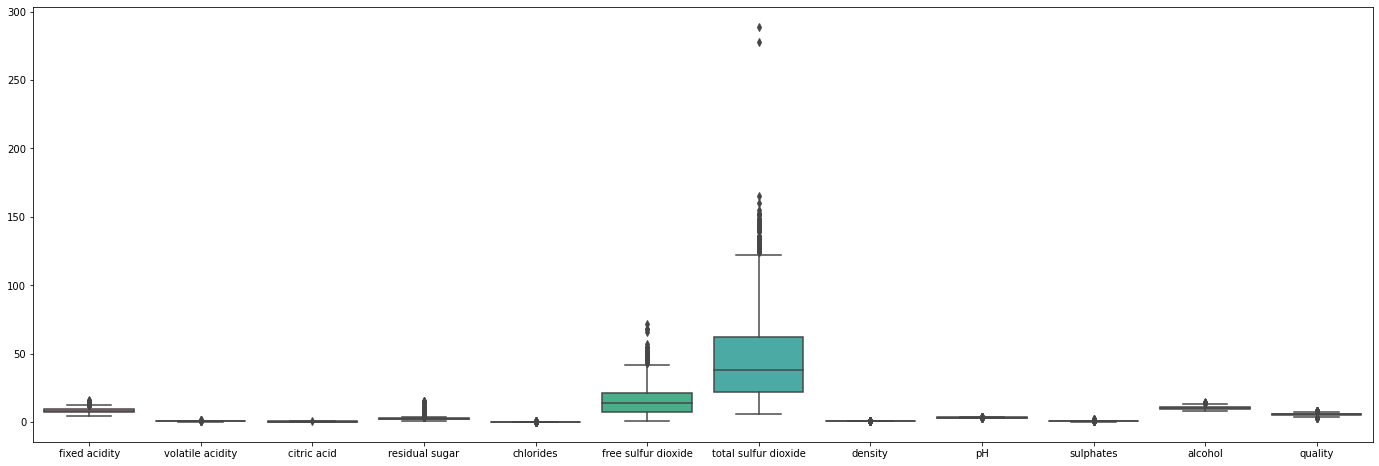

In [8]:
# Check for outliers
plt.figure(figsize=(24, 8))
sns.boxplot(data=winequality)

(1179, 12)


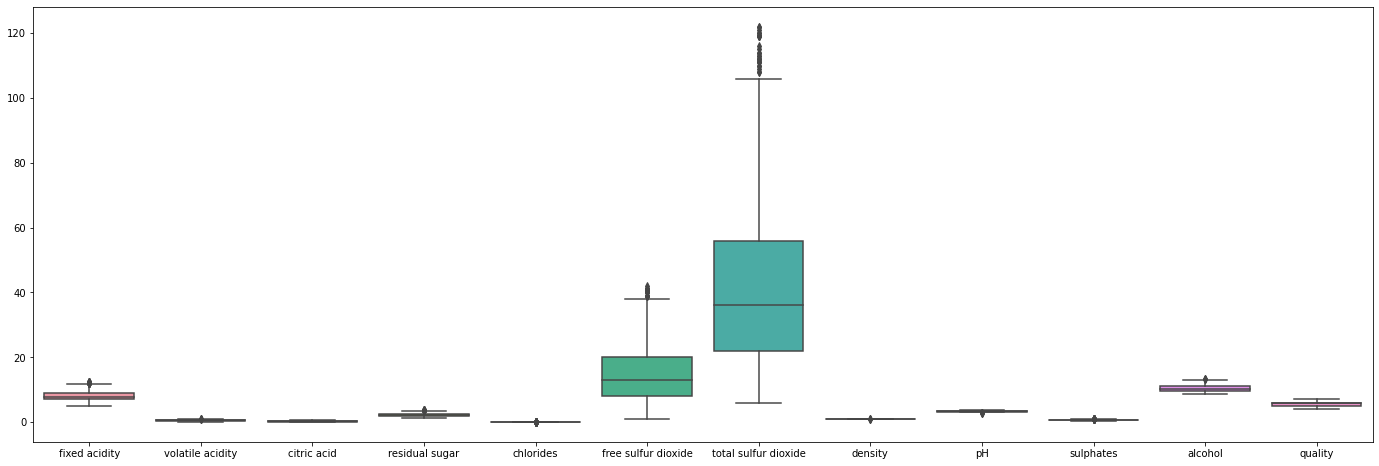

In [9]:
Q1 = winequality.quantile(0.25)
Q3 = winequality.quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

# Removal of the outlier
winequality = winequality[~((winequality < (Q1 - 1.5 * IQR)) |(winequality > (Q3 + 1.5 * IQR))).any(axis=1)]

# Recheck  the box plot
plt.figure(figsize=(24, 8))
sns.boxplot(data=winequality)

# New  Shape of the dataset
print(winequality.shape)

5    513
6    498
7    135
4     33
Name: quality, dtype: int64

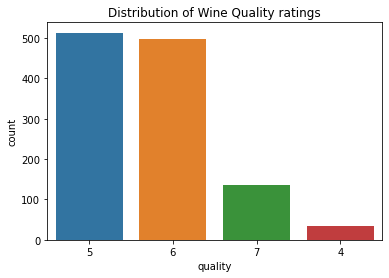

In [10]:
# Examine the target variable
plt.title("Distribution of Wine Quality ratings")
sns.countplot(x='quality', data=winequality, order=winequality['quality'].value_counts().index)
winequality['quality'].value_counts()

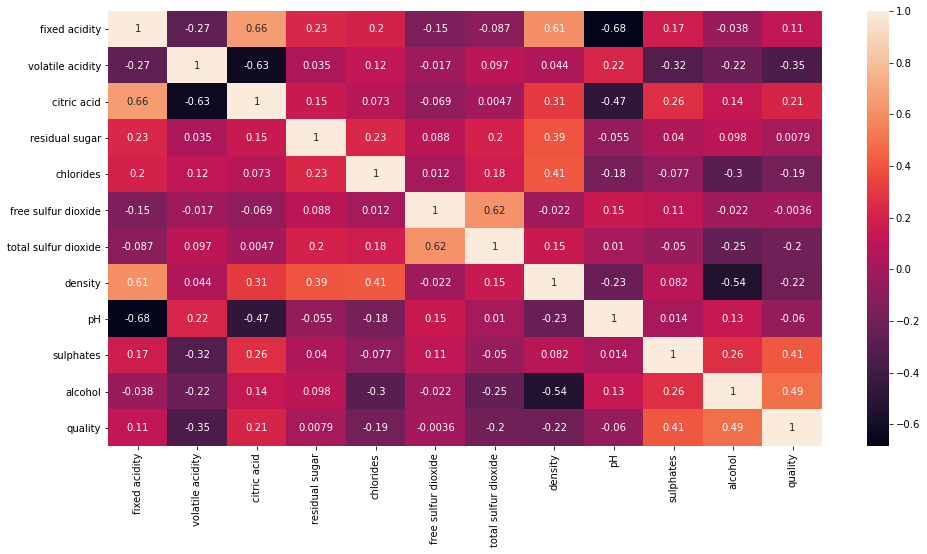

In [11]:
# We will first create the correlation heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(winequality.corr(), annot=True);

High Positive Correlation with - Alcohol<br>
Moderate Positive Correlation with - Sulphates, Citric Acid<br>
High Negative Correlation with - Volatice acidity<br>
Moderate negative Correlation with - Total Sulphur Dioxide, Density

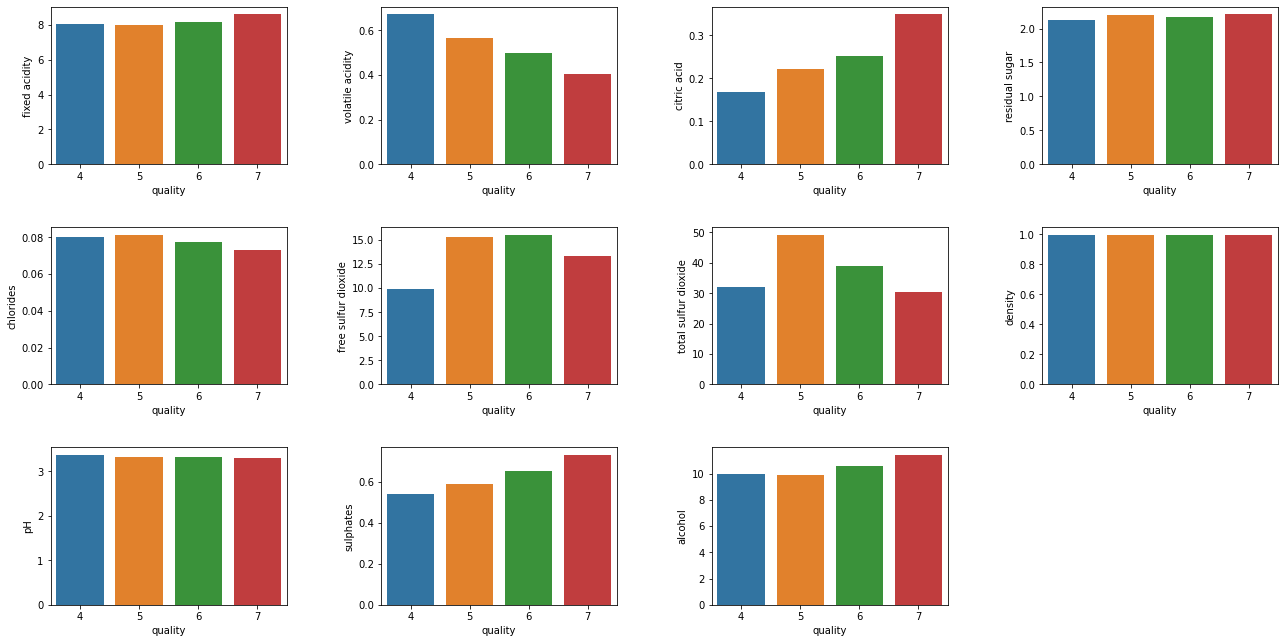

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,4,8.036364,0.671818,0.167576,2.130303,0.080182,9.939394,31.909091,0.996846,3.366667,0.541515,10.001515
1,5,8.023782,0.566930,0.220799,2.192885,0.081374,15.280702,49.276803,0.996905,3.325614,0.589220,9.892008
2,6,8.189558,0.500341,0.251044,2.175000,0.077187,15.548193,38.945783,0.996456,3.327771,0.653815,10.555388
3,7,8.616296,0.403852,0.348963,2.208889,0.072763,13.325926,30.422222,0.995772,3.298963,0.729778,11.424815


In [12]:
avgdf = winequality.groupby('quality').mean().reset_index()

fig = plt.figure(figsize=(22, 11))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(3, 4, 1)
sns.barplot(x='quality', y='fixed acidity', data=avgdf, ax=ax)
ax = fig.add_subplot(3, 4, 2)
sns.barplot(x='quality', y='volatile acidity', data=avgdf, ax=ax)
ax = fig.add_subplot(3, 4, 3)
sns.barplot(x='quality', y='citric acid', data=avgdf, ax=ax)
ax = fig.add_subplot(3, 4, 4)
sns.barplot(x='quality', y='residual sugar', data=avgdf, ax=ax)
ax = fig.add_subplot(3, 4, 5)
sns.barplot(x='quality', y='chlorides', data=avgdf, ax=ax)
ax = fig.add_subplot(3, 4, 6)
sns.barplot(x='quality', y='free sulfur dioxide', data=avgdf, ax=ax)
ax = fig.add_subplot(3, 4, 7)
sns.barplot(x='quality', y='total sulfur dioxide', data=avgdf, ax=ax)
ax = fig.add_subplot(3, 4, 8)
sns.barplot(x='quality', y='density', data=avgdf, ax=ax)
ax = fig.add_subplot(3, 4, 9)
sns.barplot(x='quality', y='pH', data=avgdf, ax=ax)
ax = fig.add_subplot(3, 4, 10)
sns.barplot(x='quality', y='sulphates', data=avgdf, ax=ax)
ax = fig.add_subplot(3, 4, 11)
sns.barplot(x='quality', y='alcohol', data=avgdf, ax=ax)
plt.show()

avgdf


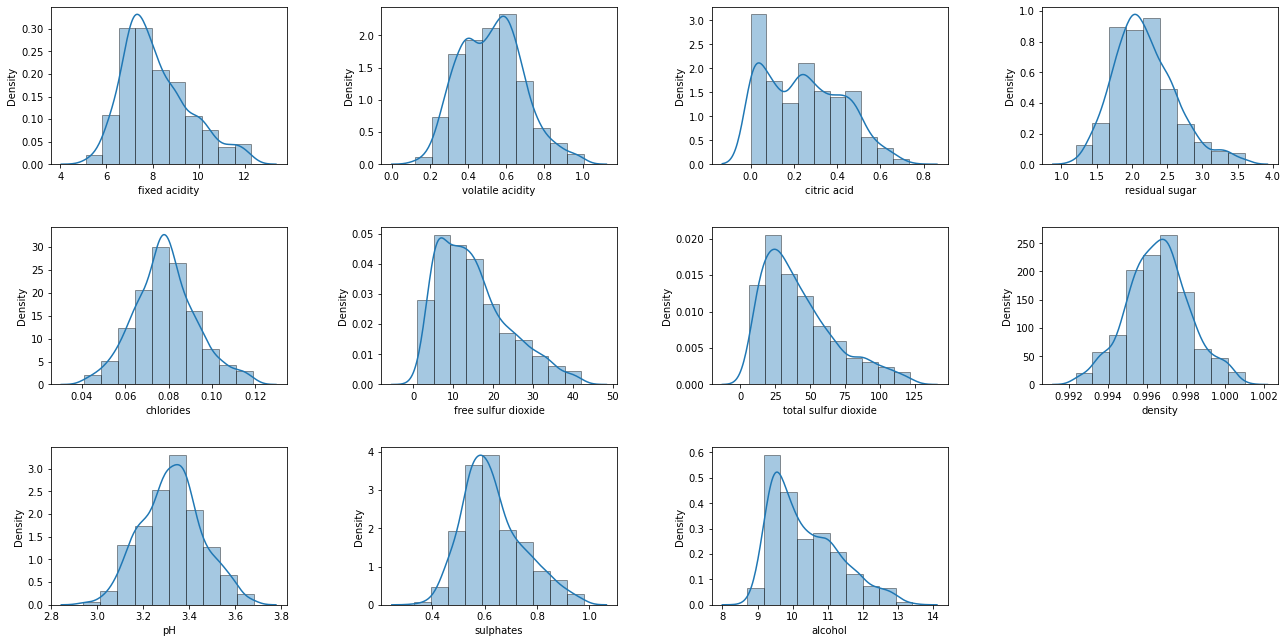

In [13]:
fig = plt.figure(figsize=(22, 11))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(3, 4, 1)
sns.distplot(winequality['fixed acidity'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
ax = fig.add_subplot(3, 4, 2)
sns.distplot(winequality['volatile acidity'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
ax = fig.add_subplot(3, 4, 3)
sns.distplot(winequality['citric acid'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
ax = fig.add_subplot(3, 4, 4)
sns.distplot(winequality['residual sugar'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
ax = fig.add_subplot(3, 4, 5)
sns.distplot(winequality['chlorides'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
ax = fig.add_subplot(3, 4, 6)
sns.distplot(winequality['free sulfur dioxide'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
ax = fig.add_subplot(3, 4, 7)
sns.distplot(winequality['total sulfur dioxide'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
ax = fig.add_subplot(3, 4, 8)
sns.distplot(winequality['density'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
ax = fig.add_subplot(3, 4, 9)
sns.distplot(winequality['pH'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
ax = fig.add_subplot(3, 4, 10)
sns.distplot(winequality['sulphates'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
ax = fig.add_subplot(3, 4, 11)
sns.distplot(winequality['alcohol'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
plt.show()

## Feature Engineering

In [14]:
# we wil examine the levels of the target variable quality

winequality['quality'].unique()

array([5, 6, 7, 4])

In [15]:
# We will encode the target variable as - Quality Good (1) or Quality Bad (0) with the following
winequality['qualityratings'] = winequality['quality'].apply(lambda x: 1 if x > 6.5 else 0)

# Check the data frame
winequality.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualityratings
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


0    1044
1     135
Name: qualityratings, dtype: int64

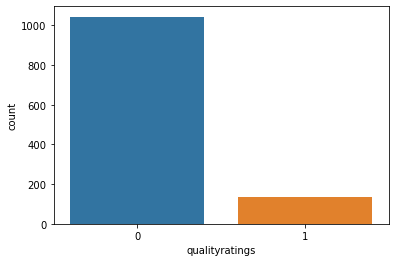

In [16]:
# Now we will check the distribution of the new discreetized target variable
sns.countplot(x='qualityratings', data=winequality, order=winequality['qualityratings'].value_counts().index)
winequality['qualityratings'].value_counts()

## Train-Test Split & Feature Scaling

In [17]:
# Since the new target class is unbalanced, we would do stratified sampling
features = winequality.drop(labels=['quality', 'qualityratings'], axis=1)
target = winequality['qualityratings']

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.3, random_state=101,
                                                                           stratify = target)

In [18]:
sc = StandardScaler()
features_train_scaled = sc.fit_transform(features_train)
features_test_scaled = sc.transform(features_test)

##  Model - SVM

### Tuning a Support Vector Classifier

Among many parameters for running rhe support vector model, few key ones are as below

**c** - controls the cost of misclassfication on the training data. A large c value gives low bias and high variance, because we penalise the cost of misclassification. similarly a low c value gives higher bias and low variance

**gamma** - high value results in the high bias and low variance, which means the support vector doesnt have a widespread influence

In [19]:
# We will define a list of param values in a grid and run SV classifier across various combinations

param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear', 'rbf', 'sigmoid', 'poly']}
svmgrid = GridSearchCV(SVC(), param_grid, verbose=100, cv=5, n_jobs=-2)
svmgrid.fit(features_train_scaled, target_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-2,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']},
             verbose=100)

In [20]:
# Check the best params
svmgrid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [21]:
svm_predictions = svmgrid.predict(features_test_scaled)

print("Confusion Matrix - Support Vector Machines")
print(confusion_matrix(target_test, svm_predictions))
print("\n")
print("Balanced Accuracy Score - Support Vector Machines")
print(balanced_accuracy_score(target_test, svm_predictions))
print("\n")
print("Classification Report - Support Vector Machines")
print(classification_report(target_test, svm_predictions))
print("\n")
print("F1 Score - Support Vector Machines")
print(f1_score(target_test, svm_predictions))

Confusion Matrix - Support Vector Machines
[[313   0]
 [ 28  13]]


Balanced Accuracy Score - Support Vector Machines
0.6585365853658537


Classification Report - Support Vector Machines
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       313
           1       1.00      0.32      0.48        41

    accuracy                           0.92       354
   macro avg       0.96      0.66      0.72       354
weighted avg       0.93      0.92      0.90       354



F1 Score - Support Vector Machines
0.48148148148148145


## Model - Gaussian Naive Bayes 

In [22]:
# Build the Model
gaussianNBClassifier = GaussianNB()
gaussianNBClassifier.fit(features_train, target_train)

GaussianNB()

In [23]:
predictionsGaussianNB = gaussianNBClassifier.predict(features_test)
print("Confusion Matrix - GaussianNB")
print(confusion_matrix(target_test, predictionsGaussianNB))
print("\n")
print("Balanced Accuracy Score - GaussianNB")
print(balanced_accuracy_score(target_test, predictionsGaussianNB))
print("\n")
print("Classification Report - GaussianNB")
print(classification_report(target_test, predictionsGaussianNB))
print("F1 Score \n")
print(f1_score(target_test, predictionsGaussianNB))

Confusion Matrix - GaussianNB
[[277  36]
 [ 12  29]]


Balanced Accuracy Score - GaussianNB
0.7961505493649186


Classification Report - GaussianNB
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       313
           1       0.45      0.71      0.55        41

    accuracy                           0.86       354
   macro avg       0.70      0.80      0.73       354
weighted avg       0.90      0.86      0.88       354

F1 Score 

0.5471698113207548


## Model - Random Forest

In [24]:
param_grid = {'n_estimators': [50, 100, 200], 'max_features': ['auto', 'sqrt'], 'bootstrap': [True, False], 'criterion':['entropy', 'gini']}
rfcgrid = GridSearchCV(RandomForestClassifier(random_state=101), param_grid, verbose=100, cv=5, n_jobs=-2)
rfcgrid.fit(features_train, target_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=101),
             n_jobs=-2,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['entropy', 'gini'],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [50, 100, 200]},
             verbose=100)

In [25]:
# Best params of Random Forest
rfcgrid.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_features': 'auto',
 'n_estimators': 200}

In [26]:

rfcpredictions = rfcgrid.predict(features_test)

print("Confusion Matrix - Random Forest Using Entropy Index")
print(confusion_matrix(target_test,rfcpredictions))
print("\n")
print("Balanced Accuracy Score - Random Forest")
print(balanced_accuracy_score(target_test, rfcpredictions))
print("\n")
print("Classification Report - Random Forest")
print(classification_report(target_test,rfcpredictions))
print("\n")
print("F1 Score - Random Forest")
print(f1_score(target_test, rfcpredictions))

Confusion Matrix - Random Forest Using Entropy Index
[[308   5]
 [ 22  19]]


Balanced Accuracy Score - Random Forest
0.7237200966258864


Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       313
           1       0.79      0.46      0.58        41

    accuracy                           0.92       354
   macro avg       0.86      0.72      0.77       354
weighted avg       0.92      0.92      0.91       354



F1 Score - Random Forest
0.5846153846153846


## Model - AdaBoost Classifier

In [27]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(features_train, target_train)

AdaBoostClassifier()

In [28]:
predictions = ada.predict(features_test)

print("Confusion Matrix - Random Forest Using Entropy Index\n")
print(confusion_matrix(target_test,predictions))
print("\n")
print("Balanced Accuracy Score \n")
print(balanced_accuracy_score(target_test, predictions))
print("\n")
print("Classification Report \n")
print(classification_report(target_test,predictions))
print("\n")
print("F1 Score \n")
print(f1_score(target_test, predictions))

Confusion Matrix - Random Forest Using Entropy Index

[[294  19]
 [ 21  20]]


Balanced Accuracy Score 

0.7135510013247097


Classification Report 

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       313
           1       0.51      0.49      0.50        41

    accuracy                           0.89       354
   macro avg       0.72      0.71      0.72       354
weighted avg       0.88      0.89      0.89       354



F1 Score 

0.5


## Model - Gradient Boosting Classifier

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {'n_estimators':[100, 200, 300], 'loss' : ['deviance', 'exponential'], 'learning_rate':[0.001, 0.01, 0.1, 1, 10], 'criterion':['friedman_mse', 'mse', 'mae']}
grid = GridSearchCV(GradientBoostingClassifier(), param_grid, verbose=True, cv=5, n_jobs=-2)
grid.fit(features_train, target_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-2,
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 200, 300]},
             verbose=True)

In [30]:
# Check the best params
grid.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'deviance',
 'n_estimators': 100}

In [31]:
grid_predictions = grid.predict(features_test)

print("Confusion Matrix")
print(confusion_matrix(target_test, grid_predictions))
print("\n")
print("Balanced Accuracy Score")
print(balanced_accuracy_score(target_test, grid_predictions))
print("\n")
print("Classification Report")
print(classification_report(target_test, grid_predictions))
print("F1 Score \n")
print(f1_score(target_test, grid_predictions))

Confusion Matrix
[[302  11]
 [ 19  22]]


Balanced Accuracy Score
0.7507207979428037


Classification Report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       313
           1       0.67      0.54      0.59        41

    accuracy                           0.92       354
   macro avg       0.80      0.75      0.77       354
weighted avg       0.91      0.92      0.91       354

F1 Score 

0.5945945945945946


## Model - XGBoost Classifier

In [32]:
from xgboost import XGBClassifier

param_grid = {'n_estimators':[50, 100, 200, 300], 'max_depth' : [3, 4, 5], 'learning_rate':[0.001, 0.01, 0.1, 1, 10]}
xggrid = GridSearchCV(XGBClassifier(), param_grid, verbose=1, cv=10, n_jobs=10)
xggrid.fit(features_train, target_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[22:31:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None

In [33]:
# Check the best params
xggrid.best_params_

{'learning_rate': 1, 'max_depth': 5, 'n_estimators': 50}

In [34]:
xggrid_predictions = xggrid.predict(features_test)

print("Confusion Matrix")
print(confusion_matrix(target_test, xggrid_predictions))
print("\n")
print("Balanced Accuracy Score")
print(balanced_accuracy_score(target_test, xggrid_predictions))
print("\n")
print("Classification Report")
print(classification_report(target_test, xggrid_predictions))
print("F1 Score \n")
print(f1_score(target_test, xggrid_predictions))

Confusion Matrix
[[303  10]
 [ 19  22]]


Balanced Accuracy Score
0.7523182420322606


Classification Report
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       313
           1       0.69      0.54      0.60        41

    accuracy                           0.92       354
   macro avg       0.81      0.75      0.78       354
weighted avg       0.91      0.92      0.91       354

F1 Score 

0.6027397260273972


## Model - KNN 

In [35]:
from sklearn.neighbors import KNeighborsClassifier

# Choosing a K Value

# Create a for loop that trains various KNN models with different k values, 
# then keep track of the error_rate for each of these models with a list. 
error_rate = []

# Will take some time
for i in range(1, 9):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(features_train_scaled, target_train)
    pred_i = knn.predict(features_test_scaled)
    error_rate.append(np.mean(pred_i != target_test))

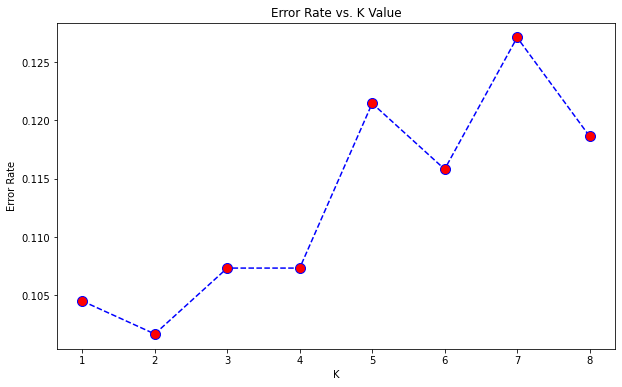

In [36]:
# Now create the following plot using the information from your for loop.
plt.figure(figsize=(10,6))
plt.plot(range(1, 9),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show() 

In [37]:
# Retrain with new K Value
# NOW WITH K=4
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(features_train_scaled, target_train)

KNeighborsClassifier(n_neighbors=2)

In [38]:
predictions = knn.predict(features_test_scaled)

print("Confusion Matrix - K Nearest Neighbor\n")
print(confusion_matrix(target_test,predictions))
print("\n")
print("Balanced Accuracy Score \n")
print(balanced_accuracy_score(target_test, predictions))
print("\n")
print("Classification Report \n")
print(classification_report(target_test,predictions))
print("\n")
print("F1 Score \n")
print(f1_score(target_test, predictions))

Confusion Matrix - K Nearest Neighbor

[[307   6]
 [ 30  11]]


Balanced Accuracy Score 

0.6245616769266734


Classification Report 

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       313
           1       0.65      0.27      0.38        41

    accuracy                           0.90       354
   macro avg       0.78      0.62      0.66       354
weighted avg       0.88      0.90      0.88       354



F1 Score 

0.3793103448275862


## Alternative Approach -
## Using Synthetic Minority Oversampling Technique (SMOTE) to improve Accuracy

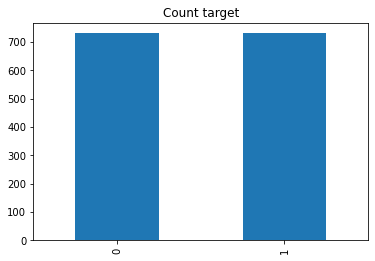

In [40]:
from imblearn.over_sampling import SMOTE

# Lets do the minority oversampling
smote = SMOTE(sampling_strategy='minority')

features_sampled, target_sampled = smote.fit_resample(features_train, target_train)
target_sampled.value_counts().plot(kind='bar', title='Count target');

## Re-Run Random Forest with Sampled Data

In [41]:
param_grid = {'n_estimators': [100, 200, 300], 'max_features': ['auto', 'sqrt'], 'bootstrap': [True, False], 'criterion':['entropy', 'gini']}
rfc = GridSearchCV(RandomForestClassifier(), param_grid, verbose=100, cv=5, n_jobs=-2)
rfc.fit(features_sampled, target_sampled)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-2,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['entropy', 'gini'],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300]},
             verbose=100)

In [42]:
# Check the best params
rfc.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_features': 'auto',
 'n_estimators': 300}

In [43]:
predictions = rfc.predict(features_test)

print("Confusion Matrix - Random Forest Using Entropy Index\n")
print(confusion_matrix(target_test,predictions))
print("\n")
print("Balanced Accuracy Score \n")
print(balanced_accuracy_score(target_test, predictions))
print("\n")
print("Classification Report \n")
print(classification_report(target_test,predictions))
print("\n")
print("F1 Score \n")
print(f1_score(target_test, predictions))

Confusion Matrix - Random Forest Using Entropy Index

[[293  20]
 [ 18  23]]


Balanced Accuracy Score 

0.7485389230889115


Classification Report 

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       313
           1       0.53      0.56      0.55        41

    accuracy                           0.89       354
   macro avg       0.74      0.75      0.74       354
weighted avg       0.89      0.89      0.89       354



F1 Score 

0.5476190476190476


## Re-Run Gradient Boosting Classifier with Sampled Data

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {'n_estimators':[100, 200, 300], 'loss' : ['deviance', 'exponential'], 'learning_rate':[0.001, 0.01, 0.1, 1, 10], 'criterion':['friedman_mse', 'mse', 'mae']}
grid = GridSearchCV(GradientBoostingClassifier(), param_grid, verbose=100, cv=5, n_jobs=-2)
grid.fit(features_sampled, target_sampled)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-2,
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 200, 300]},
             verbose=100)

In [45]:
grid.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 1,
 'loss': 'exponential',
 'n_estimators': 300}

In [46]:
grid_predictions = grid.predict(features_test)

print("Confusion Matrix")
print(confusion_matrix(target_test, grid_predictions))
print("\n")
print("Balanced  Accuracy Score")
print(balanced_accuracy_score(target_test, grid_predictions))
print("\n")
print("Classification Report")
print(classification_report(target_test, grid_predictions))
print("F1 Score \n")
print(f1_score(target_test, grid_predictions))

Confusion Matrix
[[292  21]
 [ 14  27]]


Balanced  Accuracy Score
0.7957219668043326


Classification Report
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       313
           1       0.56      0.66      0.61        41

    accuracy                           0.90       354
   macro avg       0.76      0.80      0.78       354
weighted avg       0.91      0.90      0.90       354

F1 Score 

0.6067415730337078


## Re-run XGBClassifier with Sampled Data

In [47]:
from xgboost import XGBClassifier

param_grid = {'n_estimators':[50, 100, 200, 300], 'max_depth' : [3, 4, 5], 'learning_rate':[0.001, 0.01, 0.1, 1, 10]}
xggrid = GridSearchCV(XGBClassifier(), param_grid, verbose=1, cv=10, n_jobs=10)
xggrid.fit(features_sampled, target_sampled)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[22:58:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None

In [48]:
# Check for the best params
xggrid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}

In [49]:
xggrid_predictions = xggrid.predict(features_test)

print("Confusion Matrix")
print(confusion_matrix(target_test, xggrid_predictions))
print("\n")
print("Balanced Accuracy Score")
print(balanced_accuracy_score(target_test, xggrid_predictions))
print("\n")
print("Classification Report")
print(classification_report(target_test, xggrid_predictions))
print("F1 Score \n")
print(f1_score(target_test, xggrid_predictions))

Confusion Matrix
[[290  23]
 [ 13  28]]


Balanced Accuracy Score
0.8047222005766383


Classification Report
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       313
           1       0.55      0.68      0.61        41

    accuracy                           0.90       354
   macro avg       0.75      0.80      0.78       354
weighted avg       0.91      0.90      0.90       354

F1 Score 

0.6086956521739131
